In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 

Using TensorFlow backend.


In [2]:
data = []
labels = []
classes = 43
cur_path = 'C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification'

In [3]:
#Retrieving the images and their labels 
#Do not run if all data files not present on system
#Skip this cell .
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)

            
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#Converting preprocessed and loaded images into an array(.npy) file to export 
#Do not run if all data files not present on system.
#skip this cell
from numpy import save
data = np.array(data)
labels = np.array(labels)
#saving .npy files
save('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\dataarrayX.npy',data)
save('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\labelsarrayY.npy',labels)

In [6]:
#First load the array files by executing following two comments

#data=np.load('dataarrayX.npy')
#labels=np.load('labelsarrayY.npy')

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

(39209, 32, 32, 3) (39209,)


In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [10]:
#Final model epochs 20 ,Adam,1 Dropout layer absent
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)         

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 107s 3ms/step - loss: 2.4359 - accuracy: 0.4002 - val_loss: 0.5628 - val_accuracy: 0.8505
Epoch 2/15
31367/31367 [==============================] - 105s 3ms/step - loss: 0.5949 - accuracy: 0.8376 - val_loss: 0.1706 - val_accuracy: 0.9587
Epoch 3/15
31367/31367 [==============================] - 102s 3ms/step - loss: 0.3033 - accuracy: 0.9182 - val_loss: 0.0937 - val_accuracy: 0.9759
Epoch 4/15
31367/31367 [==============================] - 91s 3ms/step - loss: 0.2040 - accuracy: 0.9438 - val_loss: 0.0685 - val_accuracy: 0.9816
Epoch 5/15
31367/31367 [==============================] - 91s 3ms/step - loss: 0.1602 - accuracy: 0.9556 - val_loss: 0.0460 - val_accuracy: 0.9881
Epoch 6/15
31367/31367 [==============================] - 92s 3ms/step - loss: 0.1348 - accuracy: 0.9638 - val_loss: 0.0627 - val_accuracy: 0.9848
Epoch 7/15
31367/31367 [==============================] - 92s 3ms/

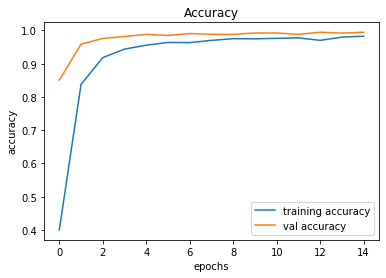

In [58]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\accuracyplot.png')
plt.show()


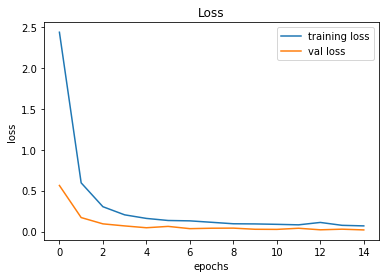

In [57]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\lossplot.png')
plt.show()


In [21]:
from keras.utils import plot_model

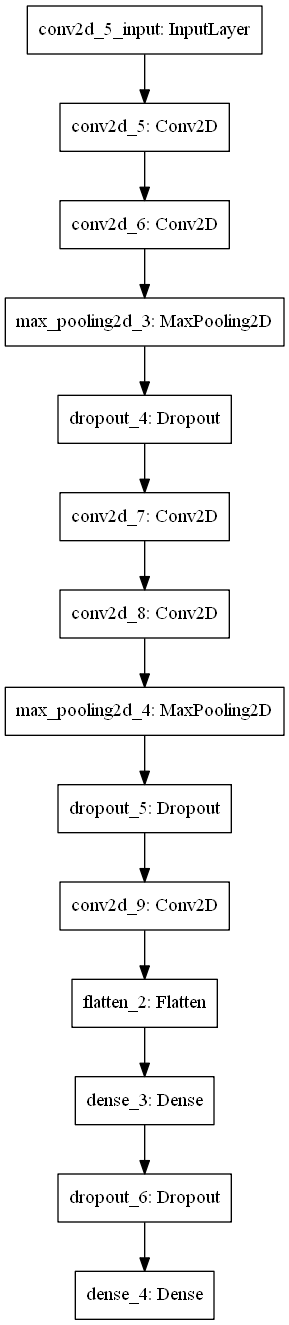

In [22]:
plot_model(model,to_file='C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\model.png')

In [25]:
y_test = pd.read_csv('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\Test.csv')

label= y_test["ClassId"].values
imgs = y_test["Path"].values

In [26]:
imgs='C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/'+imgs

In [27]:
imgs

array(['C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00000.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00001.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/00002.png',
       ...,
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12627.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12628.png',
       'C:/Users/hp/Desktop/ML_projects/Traffic sign Classification/Test/12629.png'],
      dtype=object)

In [28]:
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test=np.array(data)

In [29]:
pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(label, pred))

0.9730799683293745


In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label,pred)


In [32]:
classs = [ 'Speed limit (20km/h)',
           'Speed limit (30km/h)',      
            'Speed limit (50km/h)',       
            'Speed limit (60km/h)',      
            'Speed limit (70km/h)',    
            'Speed limit (80km/h)',      
            'End of speed limit (80km/h)',     
            'Speed limit (100km/h)',    
            'Speed limit (120km/h)',     
           'No passing',   
           'No passing veh over 3.5 tons',     
           'Right-of-way at intersection',     
           'Priority road',    
           'Yield',     
           'Stop',       
           'No vehicles',       
           'Veh > 3.5 tons prohibited',       
           'No entry',       
           'General caution',     
           'Dangerous curve left',      
           'Dangerous curve right',   
           'Double curve',      
           'Bumpy road',     
           'Slippery road',       
           'Road narrows on the right',  
           'Road work',    
           'Traffic signals',      
           'Pedestrians',     
           'Children crossing',     
           'Bicycles crossing',       
           'Beware of ice/snow',
           'Wild animals crossing',      
           'End speed + passing limits',      
           'Turn right ahead',     
           'Turn left ahead',       
           'Ahead only',      
           'Go straight or right',      
           'Go straight or left',      
           'Keep right',     
           'Keep left',      
           'Roundabout mandatory',     
           'End of no passing',      
           'End no passing veh > 3.5 tons' ]

In [33]:
from sklearn.metrics import classification_report
cf=classification_report(label,pred,target_names=classs,output_dict=True)

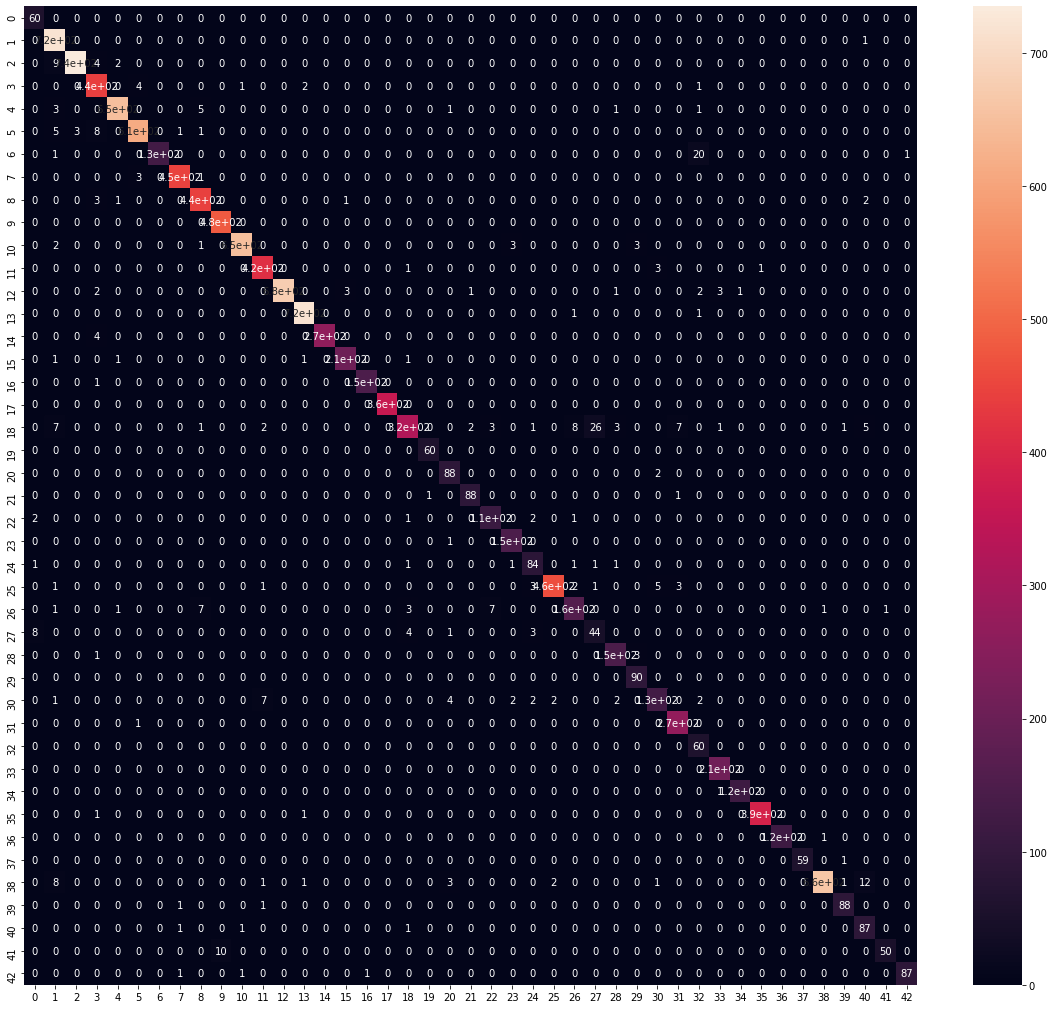

In [34]:
import seaborn as sns
fig_dims=(20,18)
fig, ax = plt.subplots(figsize=fig_dims)
cmplot=sns.heatmap(cm,annot=True)
fig.savefig('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\cmplot.png')

# GUI

In [6]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('C:\\Users\\hp\\Desktop\\ML_projects\\Traffic sign Classification\\New_model1.h5')

Using TensorFlow backend.


In [7]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [8]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)


In [9]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    print(image.shape)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
   

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [5]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

(1, 32, 32, 3)
Keep right


# TESTING WITHOUT GUI

In [22]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
def preprocess(img):
    image = load_img(img, target_size=(32,32,3))
    plt.imshow(image)
    image = img_to_array(image)
    pred=model.predict(image.reshape(-1,32,32,3))
    print(pred)
    pred=np.argmax(pred,axis=1)
    pred=pred[0]
    pred=classes[pred+1]
    print(pred)
    

ENter image pathC:\Users\hp\Desktop\ML_projects\Traffic sign Classification\Test\00002.png
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Keep right


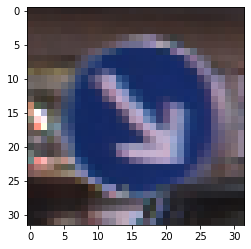

In [23]:
img=input('ENter image path')
preprocess(img)
